<a href="https://colab.research.google.com/github/Abhishekravindran/TF_LITE-OPTIMIZATION-For-DEEP-NEURAL-NET/blob/main/cnnpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D ,MaxPool2D,Flatten,Dense
from sklearn.metrics import accuracy_score
from sys import getsizeof
import h5py
import os

In [18]:
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

In [19]:
X_train.shape

# 50k images of 32x32 pixels with 3 channels i.e RGB before we proceed further 
 # we need to do normalization to the images before we input the image to a cnn model i.e for cnn we need height , width, channels as its 
 # already availabe and that we need to normalize the pixels between 0-1 for effecient processing 


(50000, 32, 32, 3)

In [20]:
X_test.shape

(10000, 32, 32, 3)

(<matplotlib.image.AxesImage at 0x7fd1cc1a2890>, array([6], dtype=uint8))

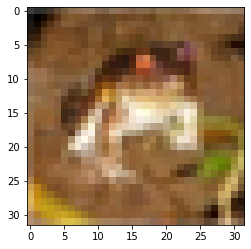

In [16]:
plt.imshow(X_train[0]),X_test[0]

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


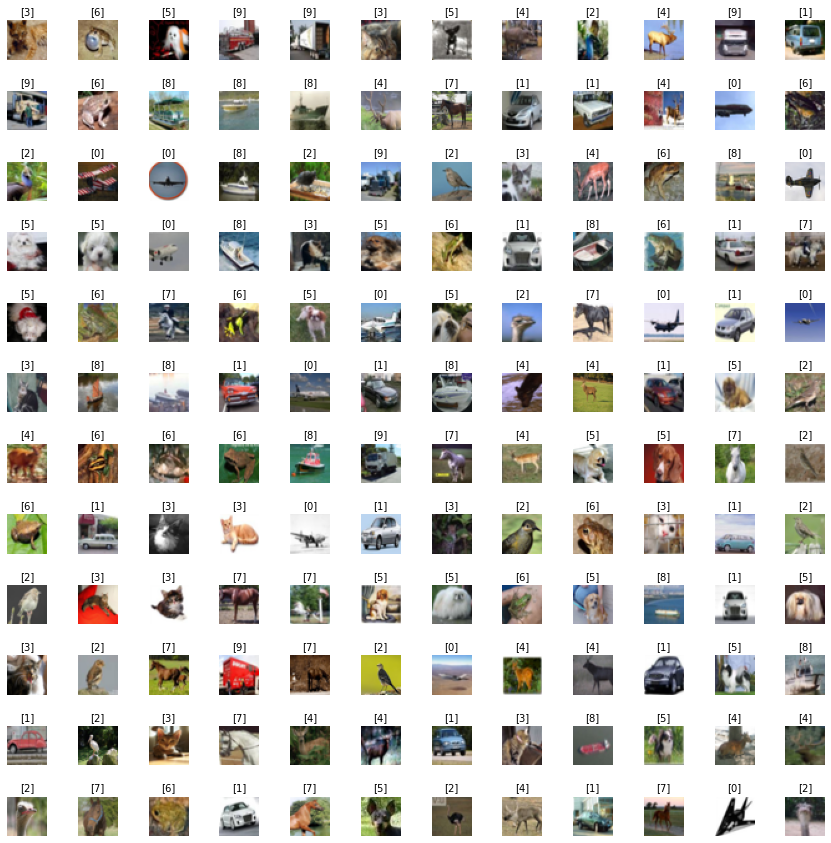

In [25]:
#vizualizing
width=12
height=12
fig,axes=plt.subplots(width,height,figsize=(15,15))
axes=axes.ravel() #10*10 =100 converting matrix to vectors
for i in np.arange(0,width*height):
  index=np.random.randint(0,49999)
  axes[i].imshow(X_train[index],cmap='gray');
  axes[i].axis('off')
  axes[i].set_title(Y_train[index],fontsize=10)
plt.subplots_adjust(hspace=0.8)

In [23]:
X_trains=X_train/255.
X_tests=X_test/255.

In [43]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=3600,activation='relu'))
model.add(Dense(units=600,activation="relu"))
model.add(Dense(units=10,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3600)              25923600  
_________________________________________________________________
dense_3 (Dense)              (None, 600)               2160600   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                6010      
Total params: 28,091,106
Trainable params: 28,091,106
Non-trainable params: 0
__________________________________________

In [45]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [46]:
network=model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 382s 244ms/step - loss: 11.4641 - accuracy: 0.4091
Epoch 2/10
1563/1563 [==============================] - 380s 243ms/step - loss: 1.2585 - accuracy: 0.5627
Epoch 3/10
1563/1563 [==============================] - 379s 243ms/step - loss: 0.9861 - accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 381s 243ms/step - loss: 0.7704 - accuracy: 0.7373
Epoch 5/10
1563/1563 [==============================] - 381s 244ms/step - loss: 0.6270 - accuracy: 0.7896
Epoch 6/10
1563/1563 [==============================] - 378s 242ms/step - loss: 0.5394 - accuracy: 0.8242
Epoch 7/10
1563/1563 [==============================] - 380s 243ms/step - loss: 0.4679 - accuracy: 0.8513
Epoch 8/10
1563/1563 [==============================] - 382s 244ms/step - loss: 0.4113 - accuracy: 0.8742
Epoch 9/10
1563/1563 [==============================] - 381s 244ms/step - loss: 0.3378 - accuracy: 0.8980
Epoch 10/10
1563/1563 [======================

In [48]:
#Fun to caluclate size
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

#fun to convert a given size into bytes
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')    

In [49]:
KERAS_MODEL_NAME = "tf_ciphar10.h5"
model.save(KERAS_MODEL_NAME)

In [52]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 321.522 Megabytes


In [53]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 16s - loss: 2.9430 - accuracy: 0.5241

Test accuracy: 0.5241000056266785


In [54]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [55]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp44aub9t5/assets


In [56]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

28109696

In [57]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 26.807 Megabytes
